In [2]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# import pandas as pd
# import numpy as np
# from faker import Faker
# import random

# # Initialize the Faker module
# fake = Faker()

# # Set the seed for reproducibility
# np.random.seed(42)
# random.seed(42)

# # Parameters
# num_entries = 50000
# num_operators = 50
# num_days = int(np.ceil(num_entries / 2000))

# # Generate random operator names
# operator_names = [fake.name() for _ in range(num_operators)]

# # Generate issue types
# issue_types = ["Road Block", "Accident", "Traffic Signal Fault", "Toll Issue", "Transport Query", "Complaint"]

# # Create empty lists to hold the data
# call_center_ids = []
# operator_names_list = []
# issue_types_list = []
# response_times = []
# call_times = []
# daily_calls = []

# # Generate data
# for day in range(num_days):
#     daily_call_count = random.randint(1000, 2000)
#     date = fake.date_this_year()
#     for _ in range(daily_call_count):
#         call_center_ids.append(fake.uuid4())
#         operator_names_list.append(random.choice(operator_names))
#         issue_types_list.append(random.choice(issue_types))
#         response_times.append(random.randint(1, 30))  # Response time between 1 to 30 minutes
#         call_times.append(fake.date_time_between(start_date=date, end_date=date))
#         daily_calls.append(daily_call_count)
        
# # Create a DataFrame
# df = pd.DataFrame({
#     "Call Center ID": call_center_ids,
#     "Operator Name": operator_names_list,
#     "Issue Type": issue_types_list,
#     "Response Time (mins)": response_times,
#     "Call Time and Date": call_times,
#     "Number of Calls Daily": daily_calls
# })

# # Shuffle the DataFrame
# df = df.sample(frac=1).reset_index(drop=True)

# # Save the DataFrame to a CSV file
# df.to_csv('call_center_data_1.csv', index=False)

# print("Synthetic dataset created successfully!")
# print(df.head())


Synthetic dataset created successfully!
                         Call Center ID    Operator Name       Issue Type  \
0  8079c659-ae22-4046-b01f-b1107fd78723  Cynthia Freeman        Complaint   
1  c366461f-b4a9-4dd9-9c0b-438c1e054d01  Cameron Cordova  Transport Query   
2  687ada65-58cf-4f6b-bc45-9aacfb55d1ba  Jeffrey Harding       Toll Issue   
3  0b7bd9ff-9f1b-4f9f-a9bf-f5bbd63802b2      Julia Jones        Complaint   
4  00aaf6c5-09d4-493d-bcf0-261e3c157683     Susan Turner        Complaint   

   Response Time (mins)         Call Time and Date  Number of Calls Daily  
0                    25 2024-03-29 00:00:00.875254                   1686  
1                     3 2024-03-03 00:00:00.063236                   1490  
2                    11 2024-03-08 00:00:00.321522                   1654  
3                    13 2024-06-22 00:00:00.235001                   1280  
4                    12 2024-03-22 00:00:00.050678                   1491  


In [21]:
# # Initialize Faker
# fake = Faker()

# # Define the number of entries
# num_entries = 500000

# # Define the columns
# columns = ["Call Center ID", "Operator Name", "Issue Type", "Response Time", "Call Time and Date", "Number of Calls"]

# # Possible values for Issue Type
# issue_types = ["License Renewal", "Vehicle Registration", "Traffic Violation", "Road Assistance", "General Inquiry"]

# # Generate fake data
# data = []
# for _ in range(num_entries):
#     call_center_id = fake.unique.random_int(min=1000, max=999999)
#     operator_name = fake.name()
#     issue_type = random.choice(issue_types)
#     response_time = random.randint(1, 60)  # in minutes
#     call_time_date = fake.date_time_this_year()
#     number_of_calls = random.randint(1, 50)  # calls per day

#     data.append([call_center_id, operator_name, issue_type, response_time, call_time_date, number_of_calls])

# # Create a DataFrame
# df = pd.DataFrame(data, columns=columns)

# # Save to a CSV file
# df.to_csv("call_center_data.csv", index=False)

# print("Fake dataset created successfully.")

df = pd.read_csv("call_center_data_1.csv")

In [22]:
df.head(2)

,Call Center ID,Operator Name,Issue Type,Response Time (mins),Call Time and Date,Number of Calls Daily
0,8079c659-ae22-4046-b01f-b1107fd78723,Cynthia Freeman,Complaint,25,2024-03-29 00:00:00.875254,1686
1,c366461f-b4a9-4dd9-9c0b-438c1e054d01,Cameron Cordova,Transport Query,3,2024-03-03 00:00:00.063236,1490


In [23]:
# Feature Engineering
df['Call Time and Date'] = pd.to_datetime(df['Call Time and Date'])
df['Hour'] = df['Call Time and Date'].dt.hour
df['Day of Week'] = df['Call Time and Date'].dt.dayofweek
df['Month'] = df['Call Time and Date'].dt.month

In [24]:
df.head(2)

,Call Center ID,Operator Name,Issue Type,Response Time (mins),Call Time and Date,Number of Calls Daily,Hour,Day of Week,Month
0,8079c659-ae22-4046-b01f-b1107fd78723,Cynthia Freeman,Complaint,25,2024-03-29 00:00:00.875254,1686,0,4,3
1,c366461f-b4a9-4dd9-9c0b-438c1e054d01,Cameron Cordova,Transport Query,3,2024-03-03 00:00:00.063236,1490,0,6,3


In [25]:
df.shape

(37729, 9)

In [26]:
df.columns

Index(['Call Center ID', 'Operator Name', 'Issue Type', 'Response Time (mins)',
       'Call Time and Date', 'Number of Calls Daily', 'Hour', 'Day of Week',
       'Month'],
      dtype='object')

Mean Squared Error: 14783.535043466172


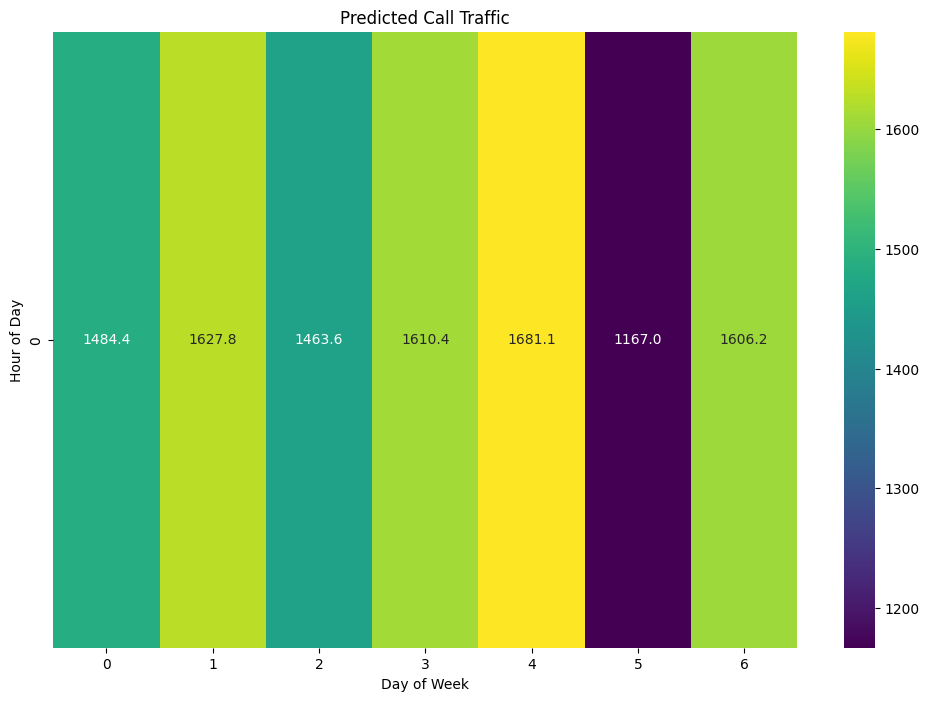

In [28]:
# One-hot encode the issue type
# df = pd.get_dummies(df, columns=['Issue Type'], drop_first=True)

# Define features and target variable
X = df[['Hour', 'Day of Week', 'Month'] + [col for col in df.columns if col.startswith('Issue Type_')]]
y = df['Number of Calls Daily']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Create a table to show the expected call traffic
predictions = model.predict(X)
df['Predicted Number of Calls'] = predictions

# Group by hour and day of week to get average predicted calls
traffic_table = df.groupby(['Hour', 'Day of Week'])['Predicted Number of Calls'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(traffic_table, annot=True, fmt=".1f", cmap='viridis')
plt.title('Predicted Call Traffic')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

In [29]:
model.score(X_test, y_test)*100

81.72301472230352

In [30]:
model.predict(X)

array([1616.42379537, 1496.48462295, 1616.42379537, ..., 1137.        ,
       1616.42379537, 1992.        ])

In [31]:
y_pred = model.predict(X_test)

In [32]:
y_pred

array([1496.48462295, 1992.        , 1903.        , ..., 1616.42379537,
       1889.        , 1606.21724027])

In [41]:
model.predict([[4,5,2]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1038.12])

In [47]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_score(y_test, SVC(kernel='rbf').fit(X_train, y_train).predict(X_test))

0.7303206997084548

In [48]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [49]:
import pickle
pickle.dump(svc, open("svcmodel.pkl", 'wb'))

# Another Prediction for call center daily call prediction

In [50]:
df1 = pd.read_csv("call_center_data_1.csv")

       Response Time (mins)  Number of Calls Daily
count          37729.000000           37729.000000
mean              15.519123            1568.390548
std                8.656658             285.125227
min                1.000000            1026.000000
25%                8.000000            1459.000000
50%               16.000000            1646.000000
75%               23.000000            1853.000000
max               30.000000            1992.000000


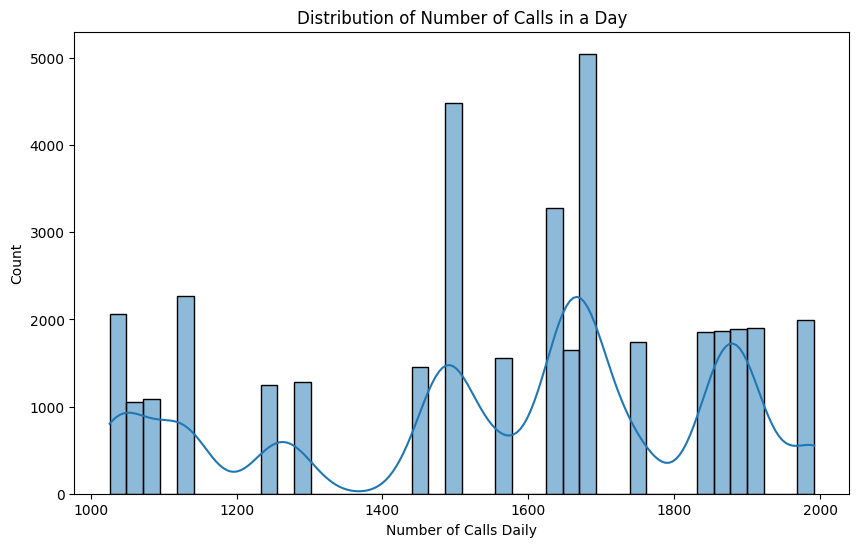

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
# df1 = pd.read_csv("call_center_data.csv")

# Summary statistics
print(df1.describe())

# Distribution of number of calls
plt.figure(figsize=(10, 6))
sns.histplot(df1['Number of Calls Daily'], kde=True)
plt.title('Distribution of Number of Calls in a Day')
plt.show()


In [56]:
# Convert 'Call Time and Date' to datetime
df1['Call Time and Date'] = pd.to_datetime(df1['Call Time and Date'])

# Extract additional features
df1['Hour'] = df1['Call Time and Date'].dt.hour
df1['Day'] = df1['Call Time and Date'].dt.day
df1['Month'] = df1['Call Time and Date'].dt.month
df1['Day of Week'] = df1['Call Time and Date'].dt.dayofweek

print(df1.head())


                         Call Center ID    Operator Name       Issue Type  \
0  8079c659-ae22-4046-b01f-b1107fd78723  Cynthia Freeman        Complaint   
1  c366461f-b4a9-4dd9-9c0b-438c1e054d01  Cameron Cordova  Transport Query   
2  687ada65-58cf-4f6b-bc45-9aacfb55d1ba  Jeffrey Harding       Toll Issue   
3  0b7bd9ff-9f1b-4f9f-a9bf-f5bbd63802b2      Julia Jones        Complaint   
4  00aaf6c5-09d4-493d-bcf0-261e3c157683     Susan Turner        Complaint   

   Response Time (mins)         Call Time and Date  Number of Calls Daily  \
0                    25 2024-03-29 00:00:00.875254                   1686   
1                     3 2024-03-03 00:00:00.063236                   1490   
2                    11 2024-03-08 00:00:00.321522                   1654   
3                    13 2024-06-22 00:00:00.235001                   1280   
4                    12 2024-03-22 00:00:00.050678                   1491   

   Hour  Day  Month  Day of Week  
0     0   29      3            4  
1   

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Features and target
X1 = df1[['Hour', 'Day', 'Month', 'Day of Week']]
y1 = df1['Number of Calls Daily']

# Split data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train model
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X1_train, y1_train)

# Predict
y_pred1 = model1.predict(X1_test)

# Evaluate
mse1 = mean_squared_error(y1_test, y_pred1)
rmse1 = np.sqrt(mse1)
print(f"Root Mean Squared Error: {rmse1:.2f}")


Root Mean Squared Error: 0.00


In [60]:
model1.score(X1_test, y1_test)*100

100.0

In [61]:
model1.predict(X1)

array([1686., 1490., 1654., ..., 1137., 1654., 1992.])

In [62]:
y_pred1 = model1.predict(X1_test)
y_pred1

array([1490., 1992., 1903., ..., 1654., 1889., 1246.])

In [65]:
model1.predict([[4,5,4,5]])

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1927.11])

In [67]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_score(y1_test, SVC(kernel='rbf').fit(X1_train, y1_train).predict(X1_test))

1.0

In [69]:
svc1 = SVC(kernel='rbf')
svc1.fit(X1_train, y1_train)

SVC()

In [70]:
import pickle
pickle.dump(svc1, open("svc1_new_model.pkl", 'wb'))